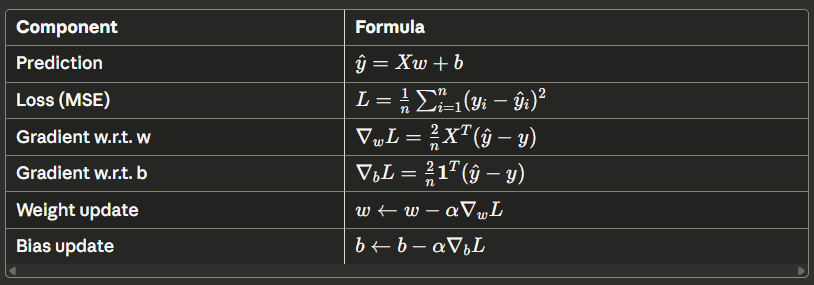

### Using numpy

In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [176]:
SEED = 43

In [177]:
num_samples = 100
np.random.seed(SEED)

In [178]:
def generate_data(num_samples):
    X = np.arange(num_samples)
    random_noise = np.random.uniform(-10, 20, num_samples)
    y = 3.5*X + random_noise
    return X, y

In [179]:
X, y = generate_data(num_samples)
data = np.stack([X, y], axis=1)

In [180]:
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,-6.548363
1,1.0,11.771996
2,2.0,1.001729
3,3.0,7.717689
4,4.0,13.814172


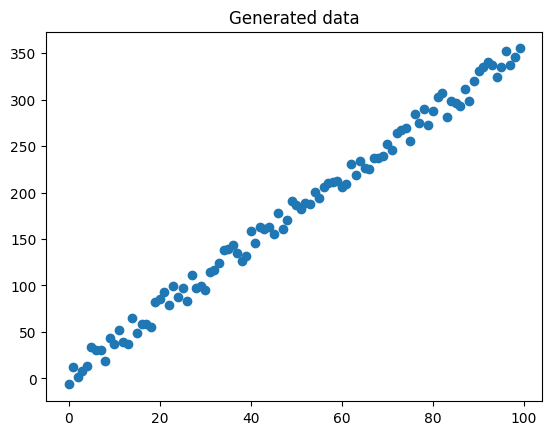

In [181]:
plt.title('Generated data')
plt.scatter(X, y)
plt.show()

In [182]:
TRAIN_SIZE = 0.75
VAL_SIZE = 0.15
TEST_SIZE = 0.1
LEARNING_RATE = 0.01
NUM_EPOCHS = 500

In [183]:
indices = np.arange(num_samples)
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [184]:
train_end = int(TRAIN_SIZE*num_samples)
val_start = train_end
val_end = int((TRAIN_SIZE+VAL_SIZE)*num_samples)
test_start = val_end

X_train, X_val, X_test = X[:train_end], X[val_start:val_end], X[test_start:]
y_train, y_val, y_test = y[:train_end], y[val_start:val_end], y[test_start:]

In [185]:
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_val: {X_val.shape}, y_val: {y_val.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

X_train: (75,), y_train: (75,)
X_val: (15,), y_val: (15,)
X_test: (10,), y_test: (10,)


In [186]:
def standarize(data, mean, std):
    return (data-mean)/std

X_mean = X_train.mean()
X_std = X_train.std()
y_mean = y_train.mean()
y_std = y_train.std()

X_train = standarize(X_train, X_mean, X_std)
y_train = standarize(y_train, y_mean, y_std)
X_val = standarize(X_val, X_mean, X_std)
y_val = standarize(y_val, y_mean, y_std)
X_test = standarize(X_test, X_mean, X_std)
y_test = standarize(y_test, y_mean, y_std)

In [187]:
W = 0.01*np.random.randn(1, 1)
b = np.zeros((1, 1))
X_train_reshaped = X_train.reshape(-1, 1)
y_train_reshaped = y_train.reshape(-1, 1)
for epoch_num in range(NUM_EPOCHS):
    y_pred = np.dot(X_train_reshaped, W) + b
    N = y_pred.shape[0]
    loss = (1/N) * np.sum((y_train_reshaped - y_pred)**2)

    if epoch_num%20 == 0:
        print(f'epoch: {epoch_num}, loss: {loss}')

    dW = -(2/N) * np.dot(X_train_reshaped.T, y_train_reshaped - y_pred)
    db = -(2/N) * np.sum(y_train_reshaped - y_pred)

    W -= LEARNING_RATE*dW
    b -= LEARNING_RATE*db

epoch: 0, loss: 0.9920222624396746
epoch: 20, loss: 0.4459977095043069
epoch: 40, loss: 0.2026343456938762
epoch: 60, loss: 0.09416719613670492
epoch: 80, loss: 0.04582334376366566
epoch: 100, loss: 0.02427646923245677
epoch: 120, loss: 0.014673018550016532
epoch: 140, loss: 0.010392756701529896
epoch: 160, loss: 0.008485042266643577
epoch: 180, loss: 0.007634773172391672
epoch: 200, loss: 0.007255807893616588
epoch: 220, loss: 0.00708690291578315
epoch: 240, loss: 0.007011621898933459
epoch: 260, loss: 0.006978069119313716
epoch: 280, loss: 0.006963114631883514
epoch: 300, loss: 0.006956449410794995
epoch: 320, loss: 0.006953478719063418
epoch: 340, loss: 0.006952154680558644
epoch: 360, loss: 0.006951564556062213
epoch: 380, loss: 0.0069513015373357774
epoch: 400, loss: 0.006951184309783152
epoch: 420, loss: 0.006951132061415602
epoch: 440, loss: 0.006951108774297073
epoch: 460, loss: 0.006951098395218939
epoch: 480, loss: 0.006951093769259625


In [191]:
X_val_reshaped = X_val.reshape(-1, 1)
X_test_reshaped = X_test.reshape(-1, 1)
y_val_reshaped = y_val.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

pred_train = np.dot(X_train_reshaped, W) + b
pred_val = np.dot(X_val_reshaped, W) + b
pred_test = np.dot(X_test_reshaped, W) + b

In [193]:
loss_train = np.mean((y_train_reshaped - pred_train)**2)
loss_val = np.mean((y_val_reshaped - pred_val)**2)
loss_test = np.mean((y_test_reshaped - pred_test)**2)
print(f'Training Loss: {loss_train}')
print(f'Validation Loss: {loss_val}')
print(f'Test Loss: {loss_test}')

Training Loss: 0.0069510917074676855
Validation Loss: 0.008644717112861496
Test Loss: 0.0046902961941193266


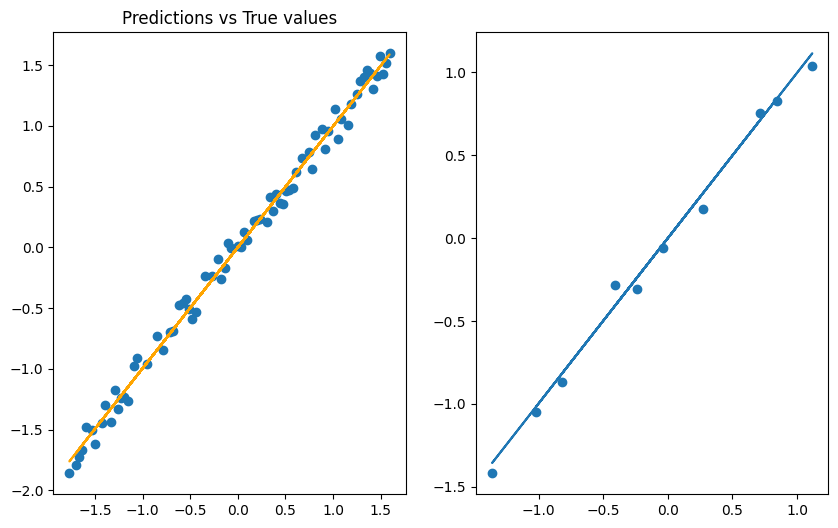

In [199]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Predictions vs True values')
plt.scatter(X_train, y_train, label='True values')
plt.plot(X_train, pred_train, color='orange', label='Prediction Line')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, label='True values')
plt.plot(X_test, pred_test, label='Predictions')
plt.show()

In [203]:
W_unscaled = W * (y_std / X_std)
b_unscaled = b * y_std + y_mean - W_unscaled * X_mean

In [204]:
W_unscaled

array([[3.53949919]])

In [205]:
b_unscaled

array([[3.64357438]])

### Using pytorch

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch

In [213]:
torch.manual_seed(SEED)

In [282]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=SEED)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=TEST_SIZE/(TEST_SIZE+VAL_SIZE), random_state=SEED)


ValueError: Found input variables with inconsistent numbers of samples: [100, 5]

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(75,) (75,)
(15,) (15,)
(10,) (10,)


In [284]:
X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))
y_scaler = StandardScaler().fit(y_train.reshape(-1, 1))

X_train = X_scaler.transform(X_train.reshape(-1, 1))
y_train = y_scaler.transform(y_train.reshape(-1, 1))
X_val = X_scaler.transform(X_val.reshape(-1, 1))
y_val = y_scaler.transform(y_val.reshape(-1, 1))
X_test = X_scaler.transform(X_test.reshape(-1, 1))
y_test = y_scaler.transform(y_test.reshape(-1, 1))

In [285]:
from torch import nn
from torch.optim import Adam

In [286]:
L2_LAMBDA = 0.01
model = nn.Linear(in_features=1, out_features=1)
optimizer = Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)
loss_fn = nn.MSELoss()

In [287]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [293]:
for epoch_num in range(NUM_EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    if epoch_num % 20 == 0:
        print(f'Epoch: {epoch_num}, Loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
y_pred_train = model(X_train)
y_pred_test = model(X_test)

Epoch: 0, Loss: 0.006990634370595217
Epoch: 20, Loss: 0.006982948165386915
Epoch: 40, Loss: 0.006978372111916542
Epoch: 60, Loss: 0.006975619588047266
Epoch: 80, Loss: 0.006973965093493462
Epoch: 100, Loss: 0.00697297090664506
Epoch: 120, Loss: 0.006972378119826317
Epoch: 140, Loss: 0.006972029805183411
Epoch: 160, Loss: 0.006971828173846006
Epoch: 180, Loss: 0.006971713621169329
Epoch: 200, Loss: 0.00697164935991168
Epoch: 220, Loss: 0.0069716135039925575
Epoch: 240, Loss: 0.006971596274524927
Epoch: 260, Loss: 0.006971582770347595
Epoch: 280, Loss: 0.006971580907702446
Epoch: 300, Loss: 0.006971580907702446
Epoch: 320, Loss: 0.006971580907702446
Epoch: 340, Loss: 0.006971580907702446
Epoch: 360, Loss: 0.006971580907702446
Epoch: 380, Loss: 0.006971580907702446
Epoch: 400, Loss: 0.006971580907702446
Epoch: 420, Loss: 0.006971580907702446
Epoch: 440, Loss: 0.006971580907702446
Epoch: 460, Loss: 0.006971580907702446
Epoch: 480, Loss: 0.006971580907702446


In [294]:
train_error = loss_fn(y_pred_train, y_train)
test_error = loss_fn(y_pred_test, y_test)
print(f'Training Loss: {train_error.item()}')
print(f'Test Loss: {test_error.item()}')

Training Loss: 0.006971580907702446
Test Loss: 0.0079469233751297


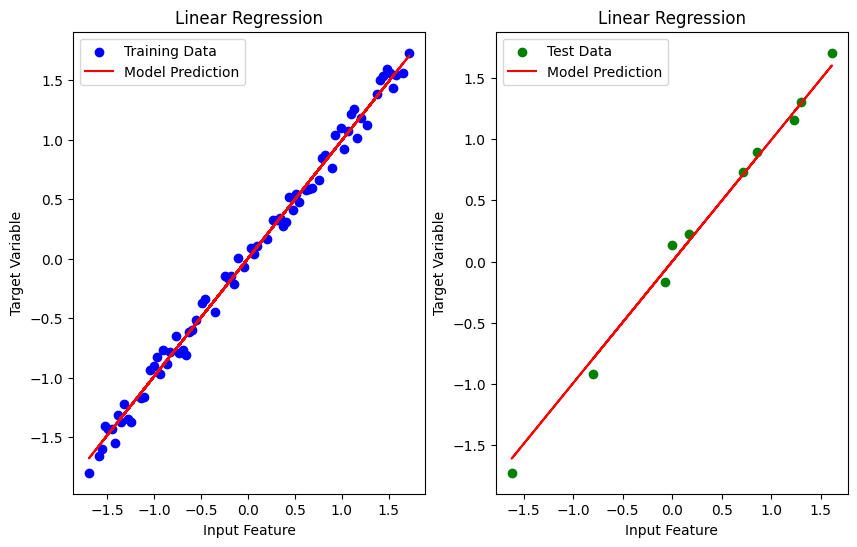

In [295]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train.numpy(), y_train.numpy(), color='blue', label='Training Data')
plt.plot(X_train.numpy(), y_pred_train.detach().numpy(), color='red', label='Model Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.title('Linear Regression')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test.numpy(), y_test.numpy(), color='green', label='Test Data')
plt.plot(X_test.numpy(), y_pred_test.detach().numpy(), color='red', label='Model Prediction')
plt.xlabel('Input Feature')
plt.ylabel('Target Variable')
plt.title('Linear Regression')
plt.legend()
plt.show()

In [296]:
print(optimizer)
print(optimizer.param_groups)
print(optimizer.param_groups[0]['params'])
print("GRAD:", optimizer.param_groups[0]['params'][0].grad)
print(model.weight.grad)
print("LOSS GRAD:", loss.grad_fn)
y_pred = model(X_train)
loss = loss_fn(y_pred, y_train)
print("BEFORE BACKWARD MODEL GRAD FN:", loss)
optimizer.zero_grad()
loss.backward()
print("AFTER BACKWARD MODEL GRAD FN:", loss)
print("MODEL GRAD:", model.weight.grad)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0.01
)
[{'params': [Parameter containing:
tensor([[0.9916]], requires_grad=True), Parameter containing:
tensor([-7.4588e-09], requires_grad=True)], 'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0.01, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': None, 'decoupled_weight_decay': False}]
[Parameter containing:
tensor([[0.9916]], requires_grad=True), Parameter containing:
tensor([-7.4588e-09], requires_grad=True)]
GRAD: tensor([[-0.0099]])
tensor([[-0.0099]])
LOSS GRAD: <MseLossBackward0 object at 0x0000022F3F463490>
BEFORE BACKWARD MODEL GRAD FN: tensor(0.0070, grad_fn=<MseLossBackward0>)
AFTER BACKWARD MODEL GRAD FN: tensor(0.0070, grad_fn=<MseLossBackward0>)
MO

In [297]:
print(model.weight)
print(model.bias)
optimizer.step()
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.9916]], requires_grad=True)
Parameter containing:
tensor([-7.4588e-09], requires_grad=True)
Parameter containing:
tensor([[0.9916]], requires_grad=True)
Parameter containing:
tensor([-7.4557e-09], requires_grad=True)


In [298]:
print(model.weight.data)

tensor([[0.9916]])
